#Se determinó con el inclinómetro negro el desplazamiento en grados por revolución, o pasos- Ajuste mecánico

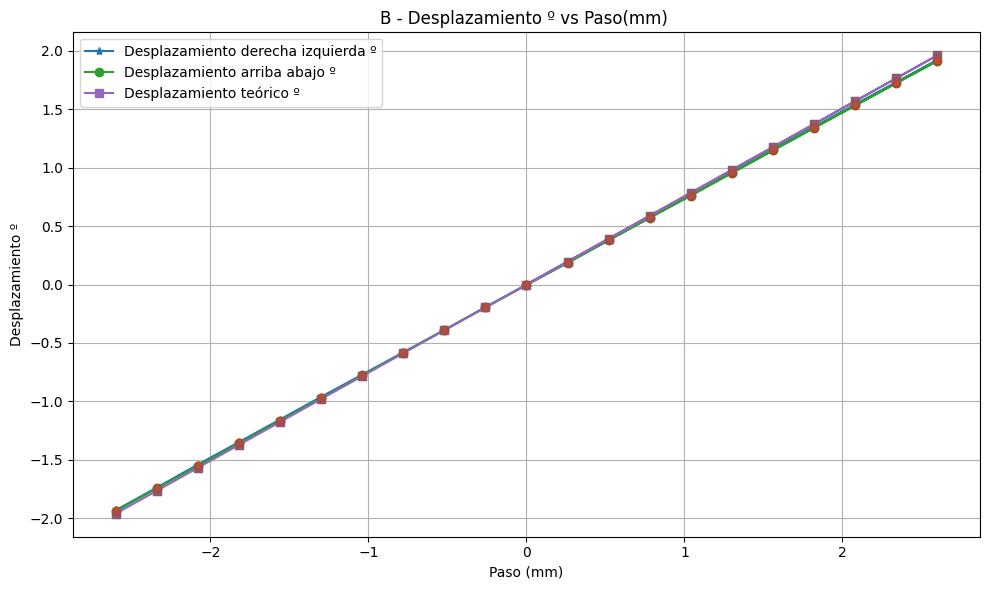

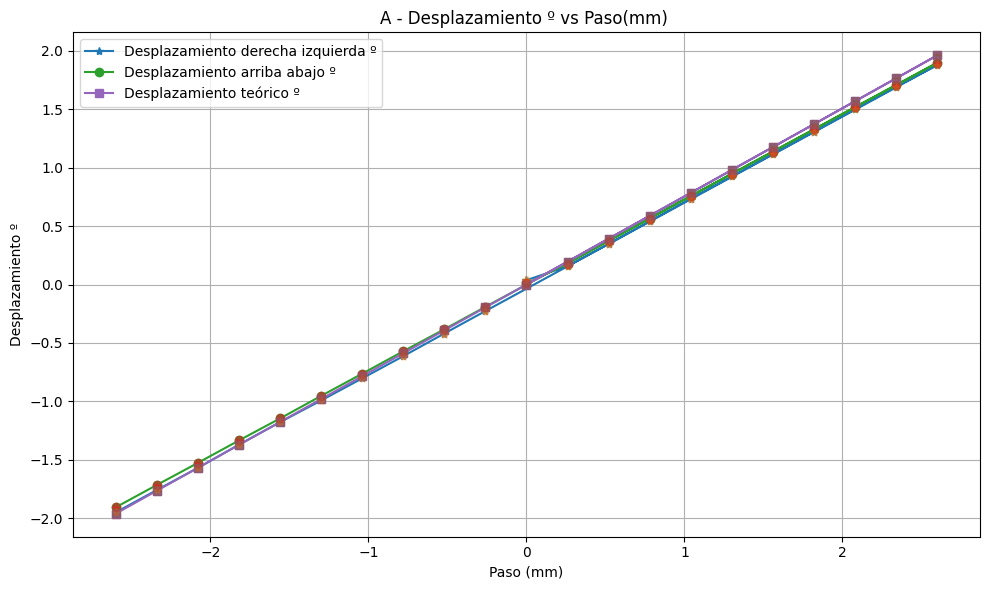

In [ ]:
from openpyxl import load_workbook
import matplotlib.pyplot as plt

# --- Funciones ---
def leer_hoja(hoja):
    paso, lr, ud, t = [], [], [], []
    for row in hoja.iter_rows(min_row=1):
        values = [row[2].value, row[3].value, row[5].value, row[7].value]
        listas = [paso, lr, ud, t]
        for val, lista in zip(values, listas):
            if isinstance(val, (int, float)):
                lista.append(val)
    return paso, lr, ud, t

def plot_with_errorbars(V, vuelta, label, marker, yerror, xerror):
    plt.plot(V, vuelta, marker=marker, label=label)
    plt.errorbar(V, vuelta, yerr=yerror, xerr=xerror, fmt=marker, capsize=3, alpha=0.5)

def graficar(paso, lr, ud, t, titulo):
    fig = plt.figure(figsize=(10, 6))
    plot_with_errorbars(paso, lr, 'Desplazamiento derecha izquierda º', '*', 0.001, 0.01)
    plot_with_errorbars(paso, ud, 'Desplazamiento arriba abajo º', 'o', 0.001, 0.01)
    plot_with_errorbars(paso, t, 'Desplazamiento teórico º', 's', 0.001, 0.01)
    plt.xlabel('Paso (mm)')
    plt.ylabel('Desplazamiento º')
    plt.title(titulo)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    return fig

# --- Carga de datos ---
workbook = load_workbook('VERANODICU.xlsx')
datos = {
    "A": leer_hoja(workbook['MONTURA A- INCL NEGRO']),
    "B": leer_hoja(workbook.worksheets[1])
}

# --- Gráficas ---
figures = []
figures.append(graficar(*datos["B"], 'B - Desplazamiento º vs Paso(mm) '))
figures.append(graficar(*datos["A"], 'A - Desplazamiento º vs Paso(mm) '))

if figures:
    plt.show()



#Se determinó con el inclinómetro negro y con la fuente de AV el desplazamiento en grados por voltaje suministrado. Se caracterizó la histéresis y se realizaron histogramas

Ingrese 0 para la montura B, arriba abajo, 1 para la montura B derecha izq, 2 para la montura A arriba abajo, 3 para la montura B derecha izq0
Ingrese 'graficar' para ver el gráfico, 'tablas' para ver las tablas, 'promedio' para ver los promedios graficar, promedio
[0, 8, 9, 17, 18, 26, 27, 35]
Elija que voltaje desea analizar: 25
Valores obtenidos Método 1: [-0.002, -0.0014999999999999996, -0.002, -0.001]
El promedio usando el M1 es: -0.001625
La desviación estñandar usando el M1 es: 0.00041457809879442503
Valores obtenidos Método 2: [0.001, 0.0, 0.0]
El promedio usando el M2 es: 0.0003333333333333333
La desviación estñandar usando el M2 es: 0.0004714045207910317


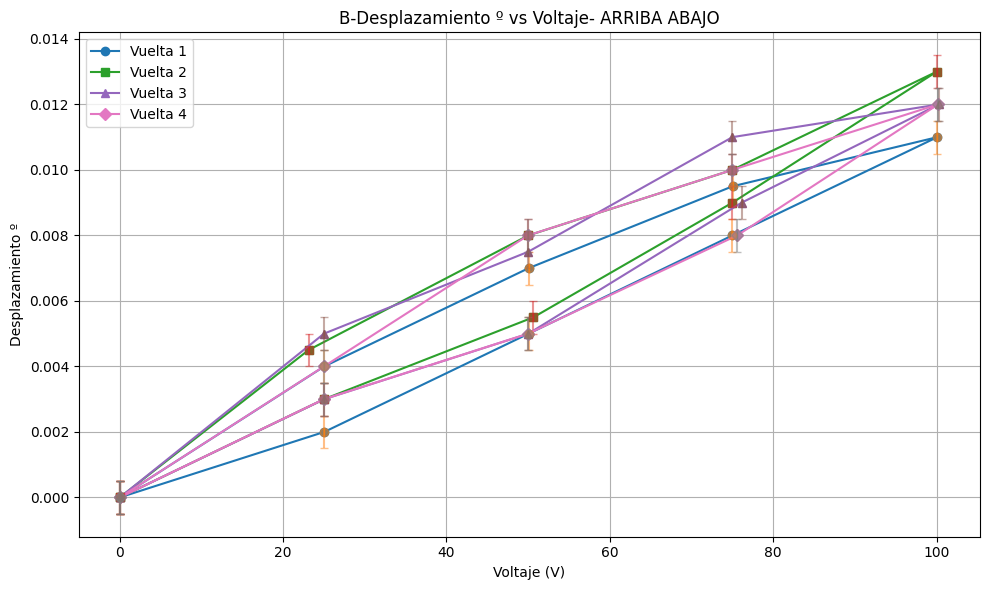

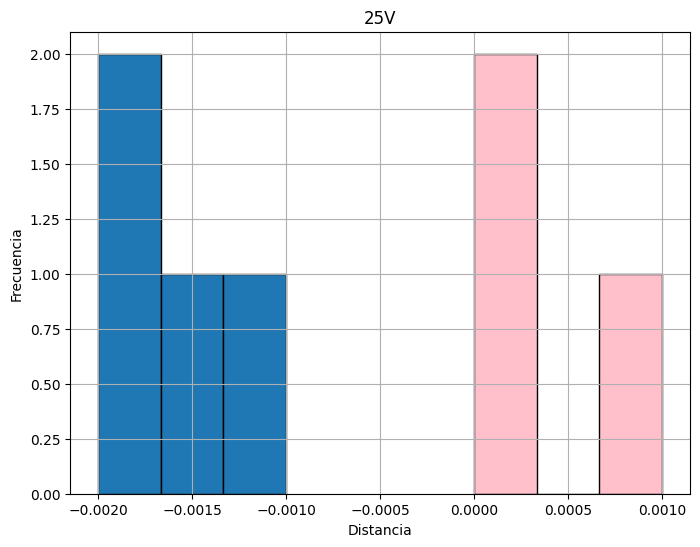

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#---MONTURA B---
a=int(input("Ingrese 0 para la montura B, arriba abajo, 1 para la montura B derecha izq, 2 para la montura A arriba abajo, 3 para la montura B derecha izq"))
action_input = input("Ingrese 'graficar' para ver el gráfico, 'tablas' para ver las tablas, 'promedio' para ver los promedios ")
actions = [action.strip() for action in action_input.split(',')]

#Nota: estos datos pueden llamarse desde el excel pero la toma de mediciones se hizo primero directamente aquí
#DATOS ARRIBA ABAJO B
VB_UD=[0, 25.04, 50.06, 75.02, 100.1, 75.04, 50.06, 25.03, 0, 0, 25.02, 50.64, 75.01, 100.03, 75.01, 50.02, 23.11, 0, 0, 25.04, 50.03, 76.14, 100.3, 75.01, 50, 25, 0.014, 0, 25, 50, 75.6, 100.2, 75, 49.99, 25, 0]
vueltaB_UD=[0, 0.002, 0.005, 0.008, 0.011, 0.0095, 0.007, 0.004, 0, 0, 0.003, 0.0055, 0.009, 0.013, 0.01, 0.008, 0.0045, 0, 0, 0.003, 0.005, 0.009, 0.012, 0.011, 0.0075, 0.005, 0, 0, 0.003, 0.005, 0.008, 0.012, 0.01, 0.008, 0.004, 0]
#DATOS IZQ DERECHA B
VB_LR=[0, 25.1, 50.06, 75.66, 100.1, 75.49, 50.06, 24.99, 0, 0, 25.03, 50.26, 75.01, 100.02, 75.01, 50.01, 25, 0, 0, 25.01, 50.02, 75.05, 100.2, 75.04, 50.01, 24.91, 0, 0, 25.01, 50.03, 74.99, 100.2, 74.99, 50.03, 24.98, 0]
vueltaB_LR=[0, 0, 0.005, 0.008, 0.01, 0.008, 0.005, 0, -0.004, 0, 0.003, 0.006, 0.009, 0.012, 0.009, 0.006, 0.002, 0.002, 0, 0.004, 0.006, 0.009, 0.012, 0.01, 0.007, 0.004, 0, 0, 0.002, 0.005, 0.008, 0.011, 0.009, 0.006, 0.003, 0]
#DATOS ARRIBA ABAJO A
VA_UD=[0.0, 25.27, 50.02, 75.57, 100.2, 74.91, 50.0, 24.98, 0.0, 0.0, 25.01, 50.08, 75.34, 100.1, 74.99, 50.01, 25.06, 0.0, 0.0, 25.01, 50.69, 74.99, 100.2, 75.0, 49.99, 25.0, 0.0, 0.0, 25.01, 50.44, 75.01, 100.2, 74.99, 50.0, 25.0, 0.0]
vueltaA_UD=[0.0, 0.003, 0.006, 0.009, 0.013, 0.011, 0.008, 0.005, 0.001, 0.001, 0.004, 0.007, 0.01, 0.013, 0.011, 0.0085, 0.0055, 0.002, 0.002, 0.0045, 0.007, 0.01, 0.0145, 0.012, 0.009, 0.0, 0.001, 0.001, 0.004, 0.007, 0.011, 0.014, 0.012, 0.009, 0.006, 0.0015]
#DATOS IZQ DERECHA A
VA_LR=[0.0, 25.02, 50.0, 75.01, 100.2, 74.16, 50.01, 24.98, 0.0, 0.0, 25.03, 50.03, 75.52, 100.2, 74.75, 50.0, 25.0, 0.0, 0.0, 25.26, 51.45, 75.09, 100.2, 74.99, 50.01, 23.02, 0.0, 0.0, 25.08, 50.01, 76.64, 100.1, 74.97, 49.76, 24.21, 0.0]
vueltaA_LR=[0.0, 0.005, 0.008, 0.012, 0.015, 0.013, 0.008, 0.005, 0.0, 0.0, 0.003, 0.006, 0.01, 0.013, 0.011, 0.007, 0.004, 0.0, 0.0, 0.003, 0.006, 0.01, 0.013, 0.011, 0.008, 0.005, 0.0, 0.0, 0.004, 0.007, 0.01, 0.013, 0.011, 0.008, 0.004, 0.0]


yerror=0.0005
xerror=0.01

if a==0:
  VB=VB_UD
  vueltaB=vueltaB_UD
  title = 'B-Desplazamiento º vs Voltaje- ARRIBA ABAJO'
elif a==1:
  VB=VB_LR
  vueltaB=vueltaB_LR
  title = 'B-Desplazamiento º vs Voltaje- DERECHA IZQUIERDA'
elif a==2:
  VB=VA_UD
  vueltaB=vueltaA_UD
  title = 'A-Desplazamiento º vs Voltaje- ARRIBA ABAJO'
elif a==3:
  VB=VA_LR
  vueltaB=vueltaA_LR
  title = 'A-Desplazamiento º vs Voltaje- DERECHA IZQUIERDA'


def plot_with_errorbars(V, vuelta, label, marker, yerror, xerror):
  """Vueltas vs V"""
  plt.plot(V, vuelta, marker=marker, label=label)
  plt.errorbar(V, vuelta, yerr=yerror, xerr=xerror, fmt=marker, capsize=3, alpha=0.5)

def zero(V):
  return [i for i, value in enumerate(V) if value < 0.1]

def tablas(V, vuelta):
  df_B = pd.DataFrame({
      "V": V,
      "Desplazamiento en grados": vuelta
  })
  print(df_B)

zero_indices=zero(VB)
print(zero_indices)

figures = []  # Para guardar las figuras creadas

if 'tablas' in actions:
    tablas(VB, vueltaB)

if 'graficar' in actions:
    fig1 = plt.figure(figsize=(10, 6))
    plot_with_errorbars(VB[zero_indices[0]:zero_indices[1]+1], vueltaB[zero_indices[0]:zero_indices[1]+1], 'Vuelta 1', 'o', yerror, xerror)
    plot_with_errorbars(VB[zero_indices[2]:zero_indices[3]+1], vueltaB[zero_indices[2]:zero_indices[3]+1], 'Vuelta 2', 's', yerror, xerror)
    plot_with_errorbars(VB[zero_indices[4]:zero_indices[5]+1], vueltaB[zero_indices[4]:zero_indices[5]+1], 'Vuelta 3', '^', yerror, xerror)
    plot_with_errorbars(VB[zero_indices[6]:zero_indices[7]+1], vueltaB[zero_indices[6]:zero_indices[7]+1], 'Vuelta 4', 'D', yerror, xerror)

    plt.xlabel('Voltaje (V)')
    plt.ylabel('Desplazamiento º')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    figures.append(fig1)

if 'promedio' in actions:

    def Volt_pos_fig(V, vuelta):
        V25_indices = [i for i, value in enumerate(V) if 23<value<30]
        V50_indices = [i for i, value in enumerate(V) if 48<value<55]
        V75_indices = [i for i, value in enumerate(V) if 73<value<80]

        V25_vuelta = [vuelta[i] for i in V25_indices]
        V50_vuelta = [vuelta[i] for i in V50_indices]
        V75_vuelta = [vuelta[i] for i in V75_indices]

        c = int(input("Elija que voltaje desea analizar: "))
        v_dict = {25: V25_vuelta, 50: V50_vuelta, 75: V75_vuelta}

        if c in v_dict:
            V = v_dict[c]
            metodo2 = [-V[0]+V[2], -V[2]+V[4], -V[4]+V[6]]
            metodo1 = [V[0]-V[1], V[2]-V[3], V[4]-V[5], V[6]-V[7]]

            print("Valores obtenidos Método 1:", metodo1)
            print("El promedio usando el M1 es:", np.mean(metodo1))
            print("La desviación estñandar usando el M1 es:", np.std(metodo1))
            print("Valores obtenidos Método 2:", metodo2)
            print("El promedio usando el M2 es:", np.mean(metodo2))
            print("La desviación estñandar usando el M2 es:", np.std(metodo2))

            fig2 = plt.figure(figsize=(8, 6))
            plt.hist(metodo2, bins='auto', edgecolor='black', color='pink')
            plt.hist(metodo1, bins='auto', edgecolor='black')
            plt.xlabel('Distancia')
            plt.ylabel('Frecuencia')
            plt.title(f'{c}V')
            plt.grid(True)
            return fig2

    fig2 = Volt_pos_fig(VB, vueltaB)
    if fig2:
        figures.append(fig2)

# Mostrar todo al final
if figures:
    plt.show()

#Se caracterizó con el inclinómetro negro, el inclinómetro rojo, se midió el desplazamiento en grados (con el inclinómetro negro) y se midió la salida de voltaje dada por el inclinómetro rojo, cuya lectura se realizó mediante la app

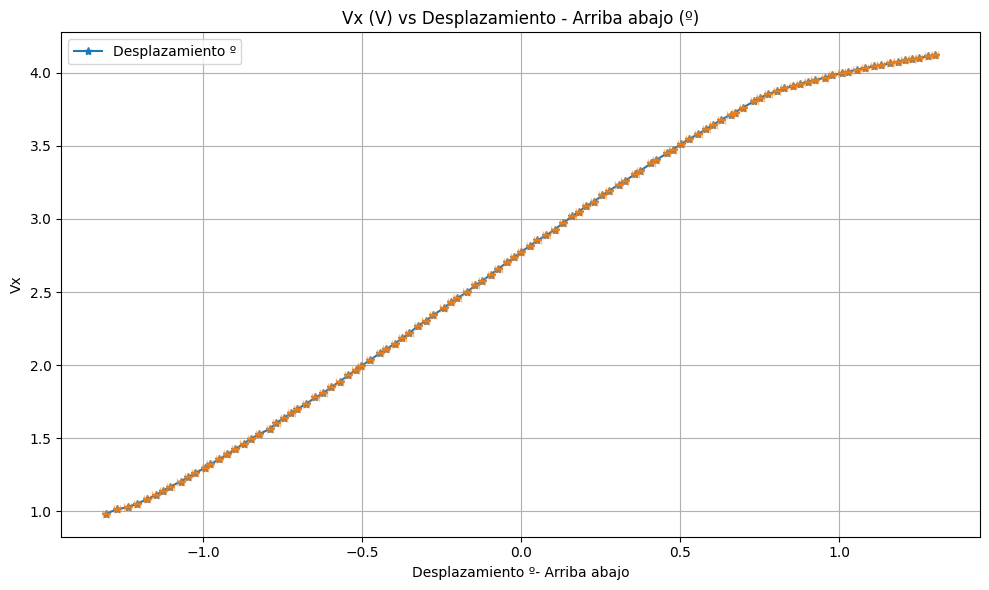

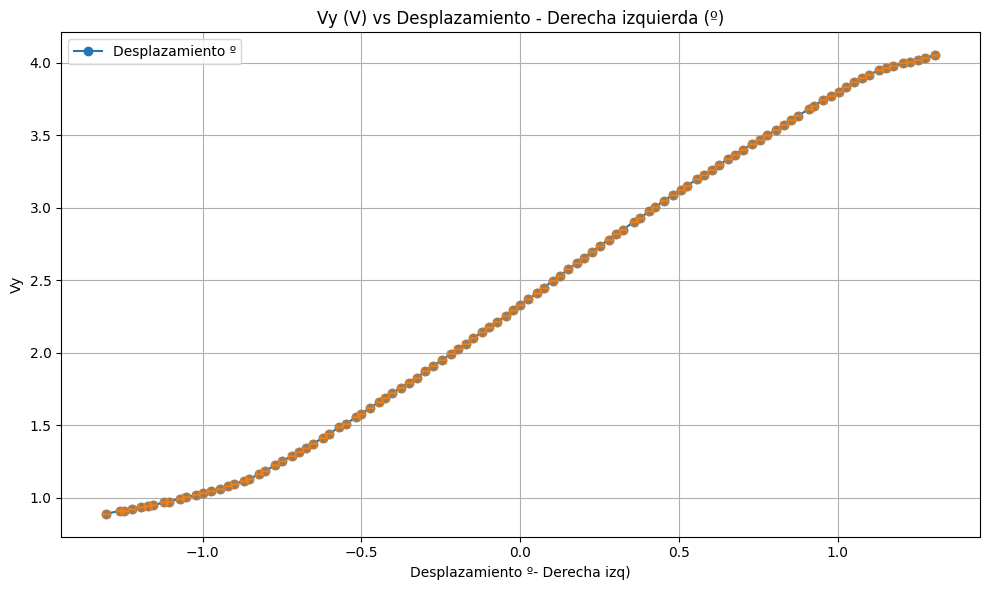

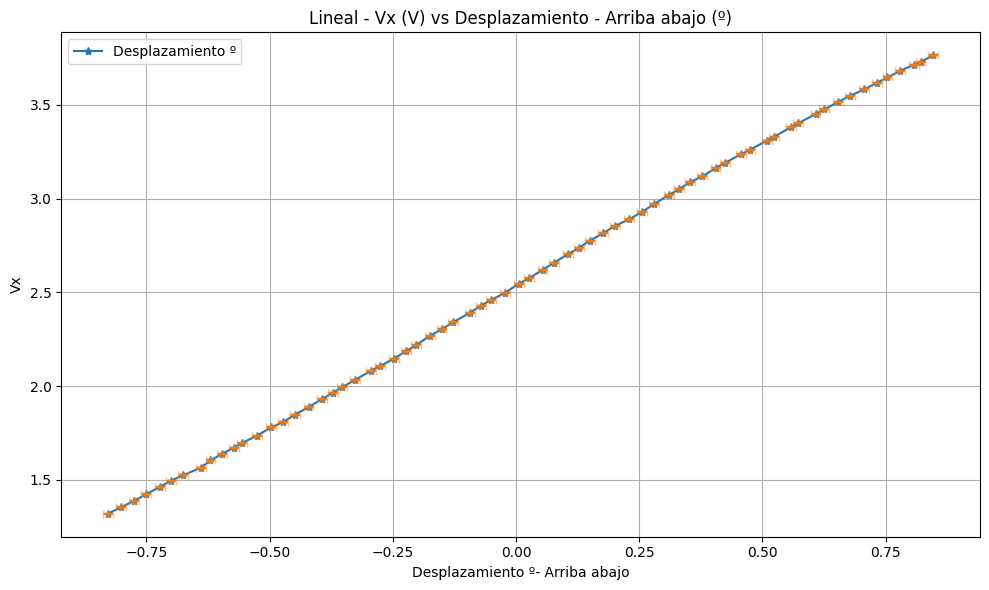

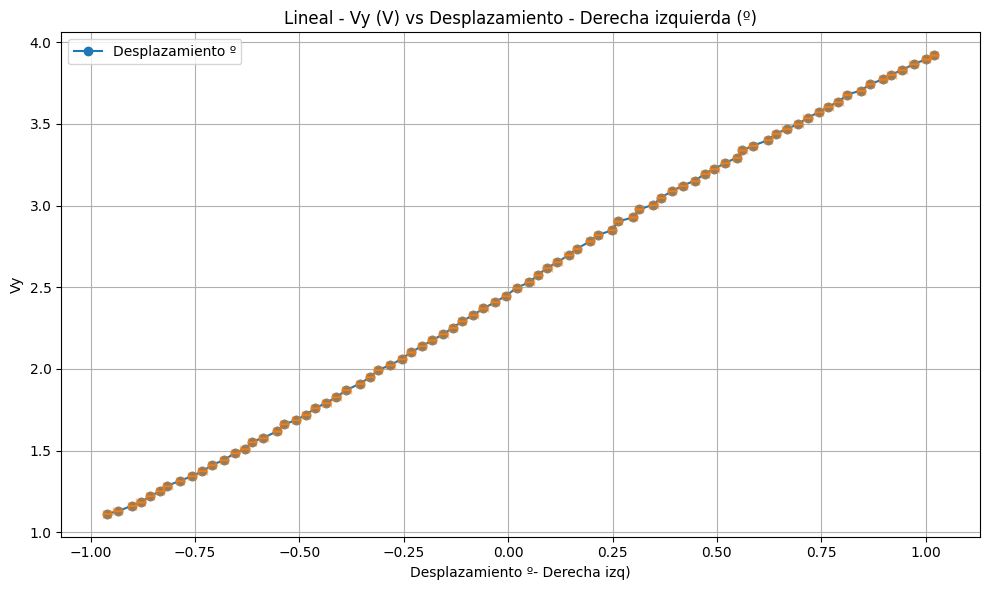

Pendiente arriba abajo: LinregressResult(slope=np.float64(0.6675174724504924), intercept=np.float64(-1.691936414816725), rvalue=np.float64(0.999799364534196), pvalue=np.float64(7.991236648646624e-114), stderr=np.float64(0.001646170744144169), intercept_stderr=np.float64(0.004380592892800191))
Pendiente derecha izquierda: LinregressResult(slope=np.float64(0.674288415047502), intercept=np.float64(-1.6640094013405984), rvalue=np.float64(0.9995488077973824), pvalue=np.float64(1.626080838296688e-120), stderr=np.float64(0.002294252369192446), intercept_stderr=np.float64(0.006091508296454223))


In [ ]:
from openpyxl import load_workbook
import matplotlib.pyplot as plt
from scipy import stats

# --- Funciones --- Nota: si no se programa por bloques se puede evitar redefinir las funciones
def leer_hoja(hoja):
    ud, Vx, lr, Vy = [], [], [], []
    for row in hoja.iter_rows(min_row=1):
        values = [row[0].value, row[1].value, row[6].value, row[7].value]
        listas = [ud, Vx, lr, Vy]
        for val, lista in zip(values, listas):
            if isinstance(val, (int, float)):
                lista.append(val)
    return ud, Vx, lr, Vy

def plot_with_errorbars(V, vuelta, label, marker, yerror, xerror, ax):
    ax.plot(V, vuelta, marker=marker, label=label)
    ax.errorbar(V, vuelta, yerr=yerror, xerr=xerror, fmt=marker, capsize=3, alpha=0.5)


# --- Carga de datos ---
workbook = load_workbook('VERANODICU.xlsx')
sheet = workbook['INCL NEGRO Y ROJO']
ud, Vx, lr, Vy = leer_hoja(sheet)

# --- Gráficas ---
figures = []

# Figura
fig1, ax1 = plt.subplots(figsize=(10, 6))
plot_with_errorbars(ud, Vx, 'Desplazamiento º', '*', 0.001, 0.01, ax1)
ax1.set_xlabel('Desplazamiento º- Arriba abajo')
ax1.set_ylabel('Vx')
ax1.set_title('Vx (V) vs Desplazamiento - Arriba abajo (º)')
ax1.grid(True)
ax1.legend()
plt.tight_layout()
figures.append(fig1)

# Figura
fig2, ax2 = plt.subplots(figsize=(10, 6))
plot_with_errorbars(lr, Vy, 'Desplazamiento º', 'o', 0.001, 0.01, ax2)
ax2.set_xlabel('Desplazamiento º- Derecha izq)')
ax2.set_ylabel('Vy')
ax2.set_title('Vy (V) vs Desplazamiento - Derecha izquierda (º)')
ax2.grid(True)
ax2.legend()
plt.tight_layout()
figures.append(fig2)

#ANÁLISIS COMPORTAMIENTO, SE SUMA/RESTA PARA PODER TENER UNA SIMETRÍA EN LOS DATOS, EN PRINCIPIO ES EL ÁNGULO RELATIVO
udL, lrL = [x+0.15 for x in ud], [x-0.11 for x in ud]
# Figura
fig3, ax3 = plt.subplots(figsize=(10, 6))
plot_with_errorbars(udL[12:80], Vx[12:80], 'Desplazamiento º', '*', 0.001, 0.01, ax3)
ax3.set_xlabel('Desplazamiento º- Arriba abajo')
ax3.set_ylabel('Vx')
ax3.set_title('Lineal - Vx (V) vs Desplazamiento - Arriba abajo (º)')
ax3.grid(True)
ax3.legend()
plt.tight_layout()
figures.append(fig3)

# Figura
fig4, ax4 = plt.subplots(figsize=(10, 6))
plot_with_errorbars(lrL[17:97], Vy[17:97], 'Desplazamiento º', 'o', 0.001, 0.01, ax4)
ax4.set_xlabel('Desplazamiento º- Derecha izq)')
ax4.set_ylabel('Vy')
ax4.set_title('Lineal - Vy (V) vs Desplazamiento - Derecha izquierda (º)')
ax4.grid(True)
ax4.legend()
plt.tight_layout()
figures.append(fig4)

if figures:
    plt.show()

slopeUD = stats.linregress(Vx[12:80], udL[12:80])
print(f"Pendiente arriba abajo: {slopeUD}")
slopeLR = stats.linregress(Vy[17:97], lrL[17:97])
print(f"Pendiente derecha izquierda: {slopeLR}")


#Con arduino UNO se cargó la conversión de V a ángulo obtenido con las pendientes anteriores. Después se le suministró AV y se hizo la lectura con el inclinómetro rojo. Después con un voltaje fijo se midió el desplazamiento y la temperatura en intervalos de un minuto.

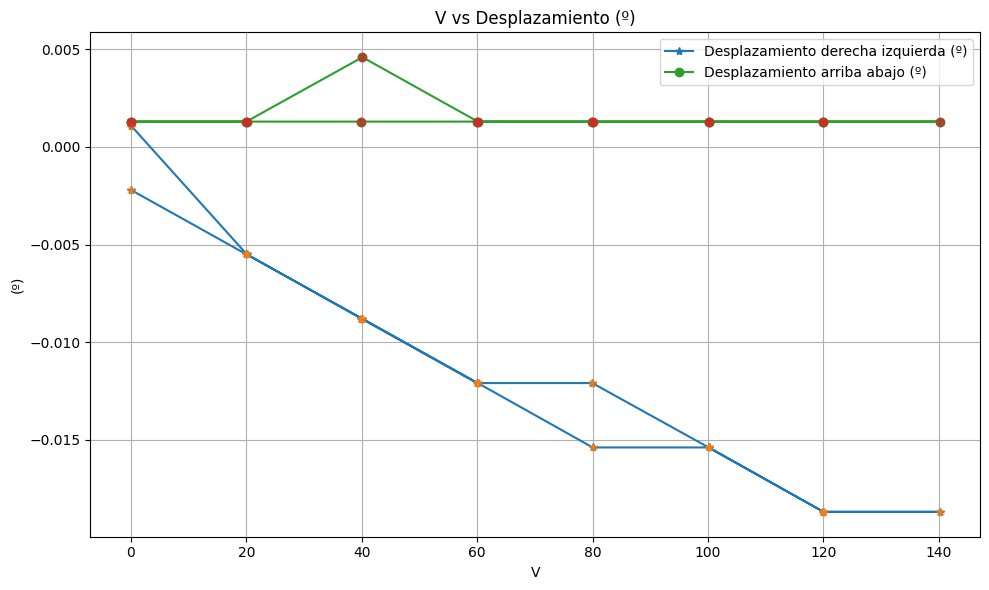

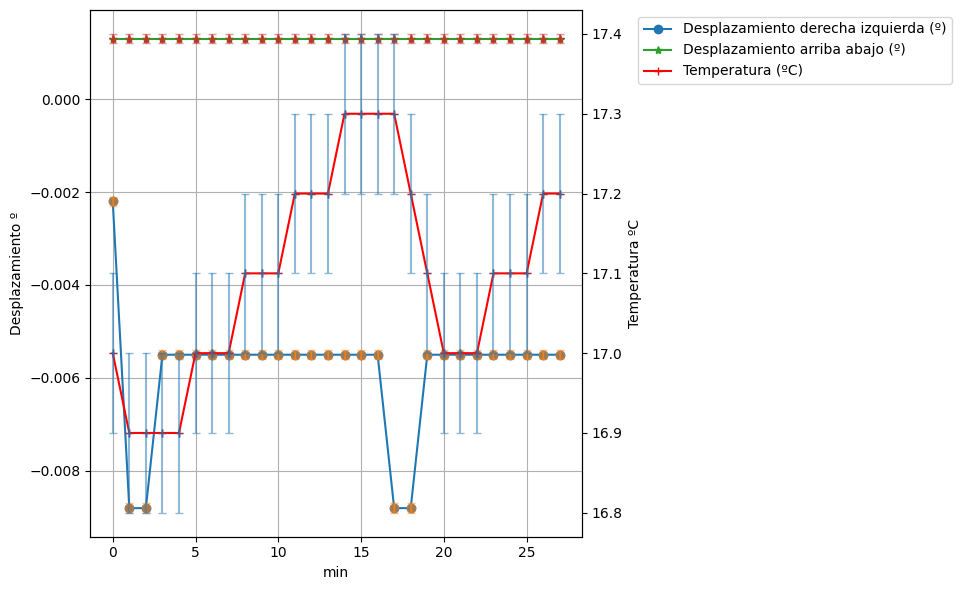

In [ ]:
from openpyxl import load_workbook
import matplotlib.pyplot as plt
from scipy import stats

# --- Funciones ---
def leer_hoja(hoja):
    av, lr, ud, UD, LR, T, min = [], [], [], [], [], [], []
    for row in hoja.iter_rows(min_row=1):
        values = [row[0].value, row[1].value, row[2].value, row[7].value, row[8].value, row[9].value, row[11].value]
        listas = [av, lr, ud, UD, LR, T, min]
        for val, lista in zip(values, listas):
            if isinstance(val, (int, float)):
                lista.append(val)
    return av, lr, ud, UD, LR, T, min

def plot_with_errorbars(V, vuelta, label, marker, yerror, xerror, ax, color=None):
    ax.plot(V, vuelta, marker=marker, label=label, color=color)
    ax.errorbar(V, vuelta, yerr=yerror, xerr=xerror, fmt=marker, capsize=3, alpha=0.5)


# --- Carga de datos ---
workbook = load_workbook('VERANODICU.xlsx')
sheet = workbook['INCL ROJO V']
av, lr, ud, UD, LR, T, min = leer_hoja(sheet)

# --- Gráficas ---
figures = []
# Figura
fig1, ax1 = plt.subplots(figsize=(10, 6))
plot_with_errorbars(av, lr, 'Desplazamiento derecha izquierda (º)', '*', 0.0001, 0.01, ax1)
plot_with_errorbars(av, ud, 'Desplazamiento arriba abajo (º)', 'o', 0.0001, 0.01, ax1)
ax1.set_xlabel('V')
ax1.set_ylabel('(º)')
ax1.set_title('V vs Desplazamiento (º)')
ax1.grid(True)
ax1.legend()
plt.tight_layout()
figures.append(fig1)

# Figura
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax3= ax2.twinx()
plot_with_errorbars(min, LR, 'Desplazamiento derecha izquierda (º)', 'o', 0.0001, 0, ax2)
plot_with_errorbars(min, UD, 'Desplazamiento arriba abajo (º)', '*', 0.0001, 0, ax2)
plot_with_errorbars(min, T, 'Temperatura (ºC)', '+', 0.1, 0, ax3, color='red')
ax2.set_xlabel('min')
ax2.set_ylabel('Desplazamiento º')
ax3.set_ylabel('Temperatura ºC')

ax2.grid(True)

# Combinar leyendas de ambos ejes
lines_1, labels_1 = ax2.get_legend_handles_labels()
lines_2, labels_2 = ax3.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
figures.append(fig2)

if figures:
    plt.show()

#Se utilizó un arduino DUE, se leyó el desplazamiento en º en función de V suministrado. Después por cada bit suministrado, se leyó con un multímetro el voltaje de salida para cuatro casos, sin salida amplificada, con una salida amplificada, con dos salidas amplificadas, con un voltaje offset

/tmp/ipython-input-1345862159.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/tmp/ipython-input-1345862159.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()
/tmp/ipython-input-1345862159.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend()
/tmp/ipython-input-1345862159.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax4.legend()
/tmp/ipython-input-1345862159.py:81: UserWarning: No artists with labels found to put in legend.  Note that arti

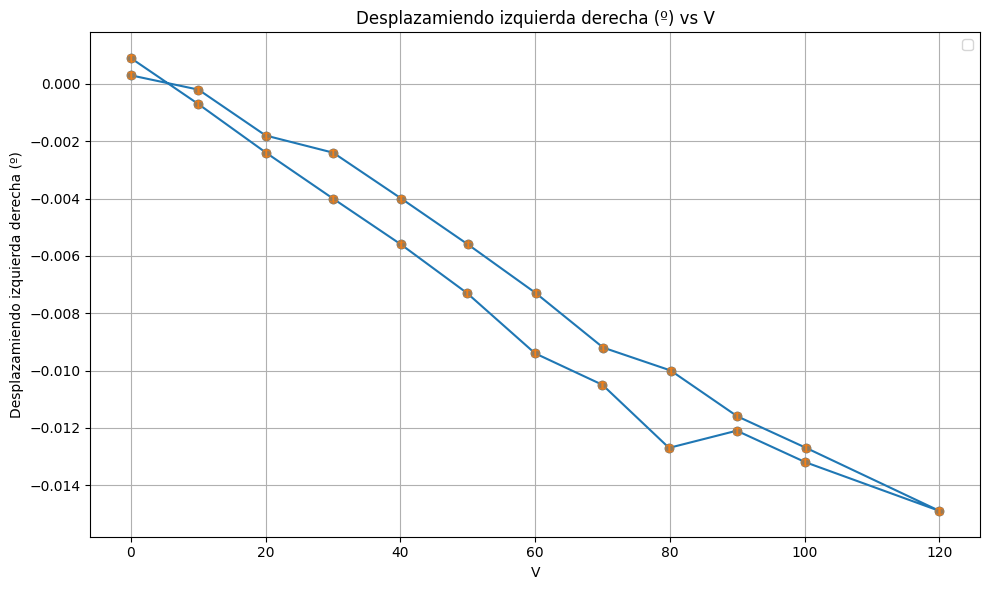

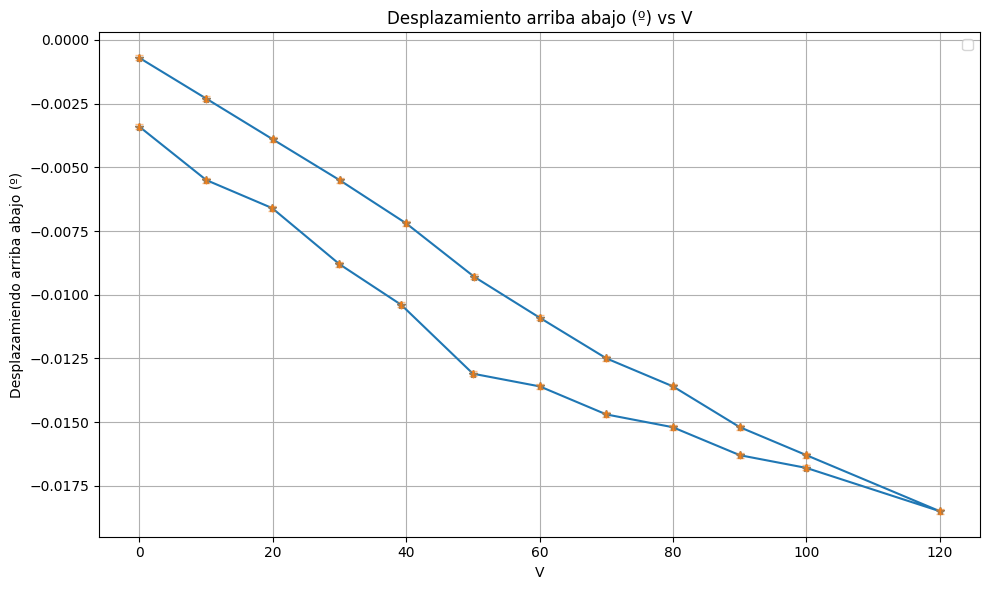

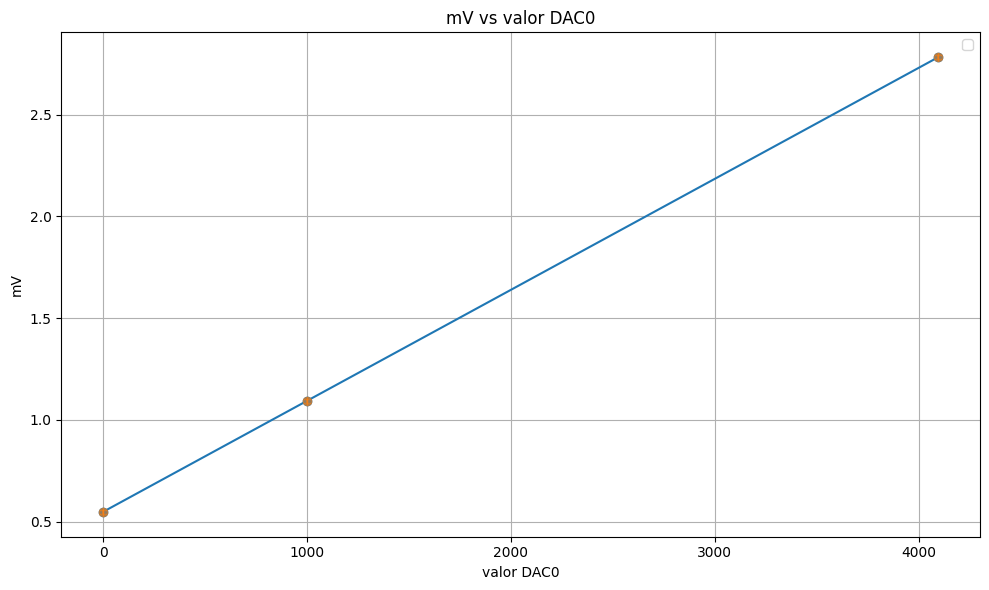

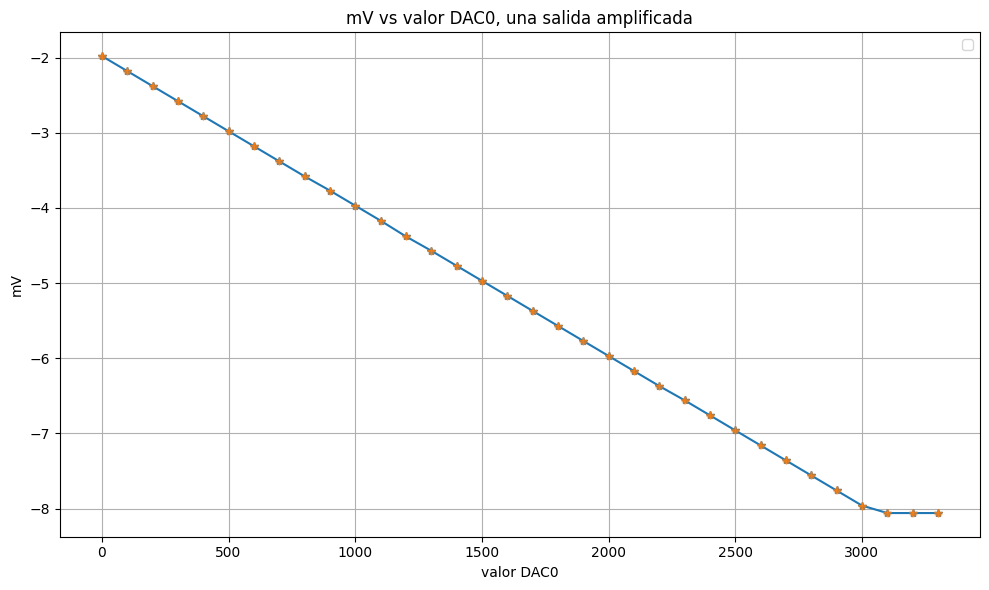

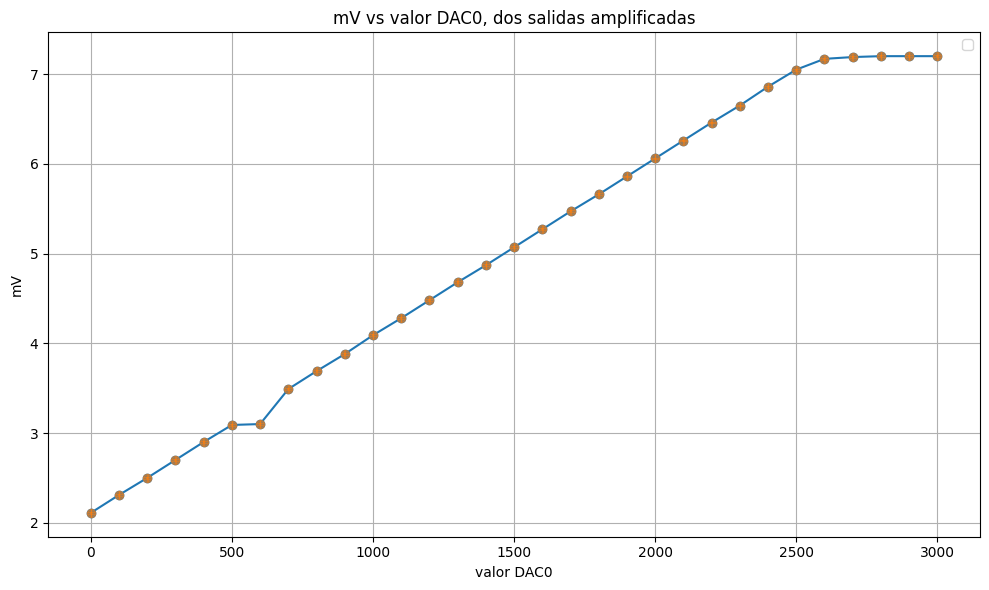

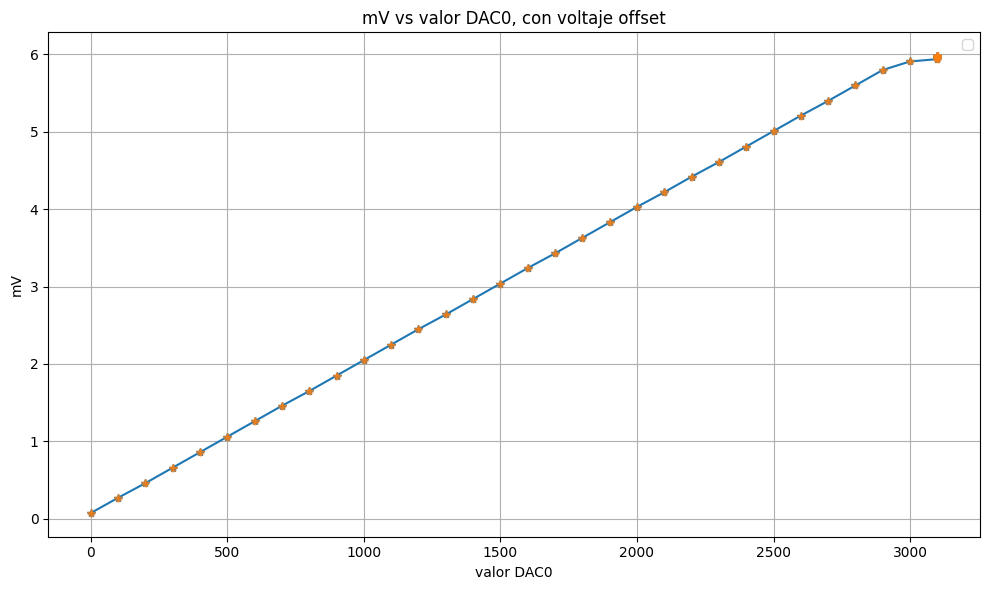

Máximo rango del DAC0 2.232


In [ ]:
from openpyxl import load_workbook
import matplotlib.pyplot as plt
from scipy import stats

# --- Funciones ---
def leer_hoja(hoja):
    V1, LR, V2, UD, b1, v1, b2, v2, b3, v3, b4, v4= [], [], [], [], [], [], [], [], [], [], [], []
    for row in hoja.iter_rows(min_row=1):
        values = [row[0].value, row[2].value, row[5].value, row[6].value, row[10].value, row[11].value, row[14].value, row[17].value, row[20].value, row[21].value, row[24].value, row[25].value]
        listas = [V1, LR, V2, UD, b1, v1, b2, v2, b3, v3, b4, v4]
        for val, lista in zip(values, listas):
            if isinstance(val, (int, float)):
                lista.append(val)
    return V1, LR, V2, UD, b1, v1, b2, v2, b3, v3, b4, v4

def plot_with_errorbars(V, vuelta, label, marker, yerror, xerror, ax, color=None):
    ax.plot(V, vuelta, marker=marker, label='', color=color)
    ax.errorbar(V, vuelta, yerr=yerror, xerr=xerror, fmt=marker, capsize=3, alpha=0.5)


# --- Carga de datos ---
workbook = load_workbook('VERANODICU.xlsx', data_only='TRUE')
sheet = workbook['ARDUINO DUO']
V1, LR, V2, UD, b1, v1, b2, v2, b3, v3, b4, v4 = leer_hoja(sheet)

# --- Gráficas ---
figures = []

# Figura 1: LR vs V1
fig1, ax1 = plt.subplots(figsize=(10, 6))
plot_with_errorbars(V1, LR, '', 'o', 0.0001, 0.01, ax1)
ax1.set_xlabel('V')
ax1.set_ylabel('Desplazamiendo izquierda derecha (º)')
ax1.set_title('Desplazamiendo izquierda derecha (º) vs V')
ax1.grid(True)
ax1.legend()
plt.tight_layout()
figures.append(fig1)

# Figura 2: V2 vs UD
fig2, ax2 = plt.subplots(figsize=(10, 6))
plot_with_errorbars(V2, UD, '', '*', 0.0001, 0.01, ax2)
ax2.set_xlabel('V')
ax2.set_ylabel('Desplazamiendo arriba abajo (º)')
ax2.set_title('Desplazamiento arriba abajo (º) vs V')
ax2.grid(True)
ax2.legend()
plt.tight_layout()
figures.append(fig2)

# Figura 3: v1 vs b1
fig3, ax3 = plt.subplots(figsize=(10, 6))
plot_with_errorbars(b1, v1, '', 'o', 0.01, 1, ax3)
ax3.set_xlabel('valor DAC0')
ax3.set_ylabel('mV')
ax3.set_title('mV vs valor DAC0')
ax3.grid(True)
ax3.legend()
plt.tight_layout()
figures.append(fig3)


# Figura 4: v2 vs b2
fig4, ax4 = plt.subplots(figsize=(10, 6))
plot_with_errorbars(b2, v2, '', '*', 0.01, 1, ax4)
ax4.set_xlabel('valor DAC0')
ax4.set_ylabel('mV')
ax4.set_title('mV vs valor DAC0, una salida amplificada')
ax4.grid(True)
ax4.legend()
plt.tight_layout()
figures.append(fig4)

# Figura 5: v3 vs b3
fig5, ax5 = plt.subplots(figsize=(10, 6))
plot_with_errorbars(b3, v3, '', 'o', 0.01, 1, ax5)
ax5.set_xlabel('valor DAC0')
ax5.set_ylabel('mV')
ax5.set_title('mV vs valor DAC0, dos salidas amplificadas')
ax5.grid(True)
ax5.legend()
plt.tight_layout()
figures.append(fig5)

# Figura 6: v4 vs b4
fig6, ax6 = plt.subplots(figsize=(10, 6))
plot_with_errorbars(b4, v4, '', '*', 0.01, 1, ax6)
ax6.set_xlabel('valor DAC0')
ax6.set_ylabel('mV')
ax6.set_title('mV vs valor DAC0, con voltaje offset')
ax6.grid(True)
ax6.legend()
plt.tight_layout()
figures.append(fig6)


if figures:
    plt.show()
print("Máximo rango del DAC0",v1[(len(v1)-1)]-v1[0])